# Problem 1: Linear Regression

## part 1

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

data = np.genfromtxt("data/curve80.txt",delimiter=None) # load the data
X = data[:,0]
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it's 2-dimensional 
Y = data[:,1] # doesn't matter for Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25
print(np.shape(Xtr))
print(np.shape(Xte))
print(np.shape(Ytr))
print(np.shape(Yte))

(60, 1)
(20, 1)
(60,)
(20,)


The Xtr and Ytr are lists with 60 elements.  The Xte and Yte are lists with 20 elements.

## part 2

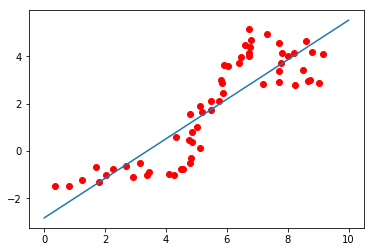

[[-2.82765049  0.83606916]]
1.1277119556093909
2.242349203010125


In [9]:
Ytr = Ytr[:, np.newaxis]
Yte = Yte[:, np.newaxis] #put X and Y into same form or the result will be wrong
lr = ml.linear.linearRegress( Xtr, Ytr ) # create and train model
xs = np.linspace(0,10,200)
xs = xs[:,np.newaxis]
ys = lr.predict( xs )
YTrPre = lr.predict(Xtr)
mseTr = np.mean((YTrPre - Ytr) ** 2)
YTePre = lr.predict(Xte)
mseTe = np.mean((YTePre - Yte) ** 2)
plt.scatter(Xtr,Ytr,c='r')
plt.plot(xs,ys)
plt.show()
print (lr.theta)
print ( mseTr)
print ( mseTe)

linear regression coefficients is -2.82765049  0.83606916

The mse for training data is 1.127, for test data is 2.24

## part 3

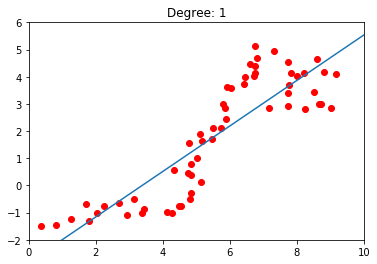

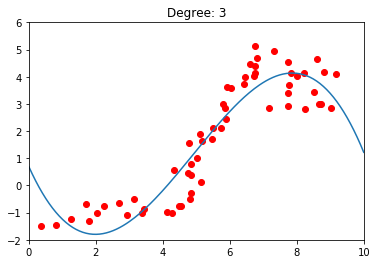

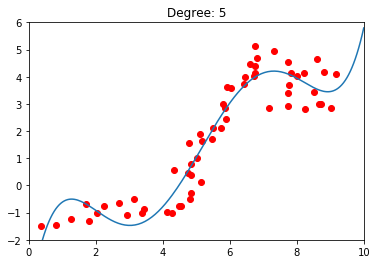

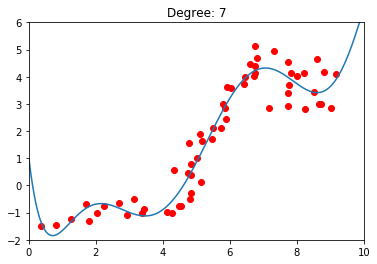

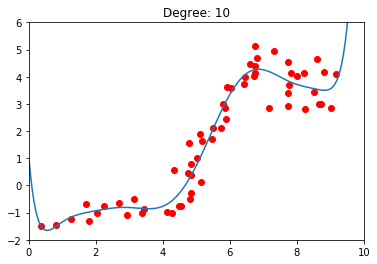

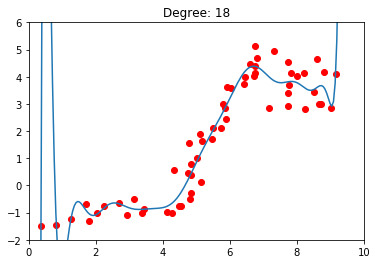

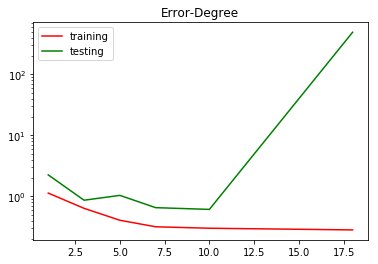

In [10]:
degrees =[1, 3, 5, 7, 10, 18]
mseTr=[]
mseTe=[]
for degree in degrees:
    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
    # Rescale the data matrix so that the features have similar ranges / variance
    XtrP,params = ml.transforms.rescale(XtrP)
    # "params" returns the transformation parameters (shift & scale)
    # Then we can train the model on the scaled feature matrix:
    lr = ml.linear.linearRegress( XtrP, Ytr ) # create and train model
    # Now, apply the same polynomial expansion & scaling transformation to Xtest:
    XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte,degree,False), params)
    XsP,_= ml.transforms.rescale( ml.transforms.fpoly(xs,degree,False), params)
    ys = lr.predict( XsP )
    plt.scatter(Xtr,Ytr,c='r')
    ax = (0,10,-2,6) #set the axis 
    plt.title("Degree: " + str(degree))
    plt.axis(ax)
    plt.plot(xs,ys)
    plt.show()
    Ytrp = lr.predict(XtrP)
    Training = np.mean((Ytrp - Ytr) ** 2)
    Ytep= lr.predict(XteP)
    Testing = np.mean((Ytep - Yte) ** 2)
    mseTr.append(Training)
    mseTe.append(Testing)
plt.semilogy(degrees, mseTr, c = 'red',label="training")
plt.legend()
plt.semilogy(degrees, mseTe, c = 'green',label="testing")
plt.legend()
plt.title("Error-Degree")
plt.show()

From the picture above, we can see that when degree is 10, the mse for Training reach there minimun while mse for Testing data is pretty small, so i will recommend degree to be 10.

# Problem 2: Cross-validation

## part 1

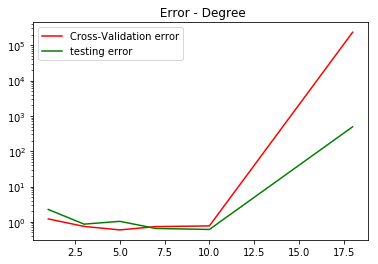

In [14]:
d =[1, 3, 5, 7, 10, 18]
res=[]
for degree in d:
    Folds = 5
    CVe=[]
    for iFold in range(nFolds):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold) # use ith block as validation 
        Yti = Yti[:, np.newaxis]
        Yvi = Yvi[:, np.newaxis] 
        XtiP = ml.transforms.fpoly(Xti, degree, bias=False)
        # Rescale the data matrix so that the features have similar ranges / variance
        XtiP,params = ml.transforms.rescale(XtiP)
        learner = ml.linear.linearRegress(XtiP,Yti) #  train on Xti, Yti
        XviP,_= ml.transforms.rescale( ml.transforms.fpoly(Xvi,degree,False), params)
        yip = learner.predict(XviP) 
        CVe.append(np.mean((yip - Yvi) ** 2))#cross-validation error
    res.append(np.mean(CVe))
plt.semilogy(d, res, c = 'r',label="Cross-Validation error")
plt.legend()
plt.semilogy(d, mseTe, c = 'g',label="testing error")
plt.legend()
plt.title(' Error - Degree')
plt.show()

## part 2

The MSE estimates from five-fold cross-validation has different lowest error point with degree = 5 compared to the MSEs evaluated on the actual test data while the lowest error point of it occurs when degree = 10, but the trend and pattern of them is pretty similar.

## part 3

The mse for five-fold cross-validation reach the minimun when degree is 5, so i will recommend degree to be 5.

## part 4

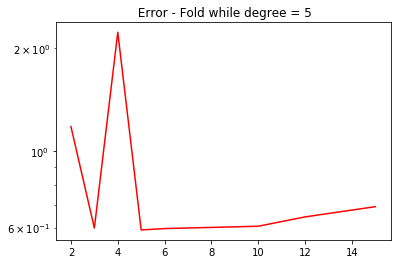

In [13]:
Folds = [2, 3, 4, 5, 6, 10, 12, 15]
tem=[]
for Fold in Folds:
    J2=[]
    for iFold in range(Fold):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,Fold,iFold) # use ith block as validation 
        Yti = Yti[:, np.newaxis]
        Yvi = Yvi[:, np.newaxis] 
        XtiP = ml.transforms.fpoly(Xti, 5, bias=False)
        # Rescale the data matrix so that the features have similar ranges / variance
        XtiP,params = ml.transforms.rescale(XtiP)
        learner = ml.linear.linearRegress(XtiP,Yti) #  train on Xti, Yti
        XviP,_= ml.transforms.rescale( ml.transforms.fpoly(Xvi,5,False), params)
        yip = learner.predict(XviP) 
        J2.append(np.mean((yip - Yvi) ** 2))#cross-validation error
    tem.append(np.mean(J2))
plt.semilogy(Folds, tem, c = 'r')
plt.title(' Error - Fold while degree = 5')
plt.show()

We can see in the picture above, the error reaches its minimum when there are 5 folds. The cross-validation error changes sharpely when the number of folds is lower than 5, and is unusually high with 4-folds. Then the error increases as the number of folds increases from 5 to 15. 

The reason is that small fold number may result in under-fitting while too much fold number results in over-fitting. Some data points in the data set that are clearly different from other data points cause a large error when divided by 4-folds .

# Statement of Collaboration

I obey all the rules of UCI academic integrity and finish the project only by my own.
Ziyang Zhang 14/10/2018